# Лабораторная работа №2

## Бинарная классификация отраженных сигналов радара

## Выполнил студент группы БФИ1901 Кумма Кирилл Сергеевич

### Цель

    Реализовать классификацию между камнями (R) и металлическими цилиндрами (M) на
    основе данных об отражении сигналов радара от поверхностей.
    60 входных значений показывают силу отражаемого сигнала под определенным углом.
    Входные данные нормализованы и находятся в промежутке от 0 до 1.
### Задачи
- Ознакомиться с задачей бинарной классификации
- Загрузить данные
- Создать модель ИНС в tf.Keras
- Настроить параметры обучения
- Обучить и оценить модель
- Изменить модель и провести сравнение. Объяснить результаты

# Выполнение работы

In [34]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [35]:
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [36]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

### Базовая модель из задания

In [37]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
h1 = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.4813 - val_loss: 0.6549 - val_accuracy: 1.0000
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5134 - val_loss: 0.6824 - val_accuracy: 0.9048
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.6578 - val_loss: 0.7052 - val_accuracy: 0.2381
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.6952 - val_loss: 0.6941 - val_accuracy: 0.4762
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.6898 - val_loss: 0.6861 - val_accuracy: 0.4762
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.7059 - val_loss: 0.7218 - val_accuracy: 0.3333
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6265 - accuracy: 0.7326 - val_loss: 0.7131 - val_accuracy: 0.3810
Epoch 8/100
1

### Модель с меньшим кол-вом нейронов

In [38]:
model_2 = Sequential()
model_2.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model_2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model_2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
h2 = model_2.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5134 - val_loss: 0.6963 - val_accuracy: 0.3333
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.6310 - val_loss: 0.6751 - val_accuracy: 0.9524
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.6364 - val_loss: 0.6881 - val_accuracy: 0.5714
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.7112 - val_loss: 0.7021 - val_accuracy: 0.3810
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.7005 - val_loss: 0.6775 - val_accuracy: 0.6190
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.7487 - val_loss: 0.7086 - val_accuracy: 0.3810
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.7005 - val_loss: 0.6996 - val_accuracy: 0.3810
Epoch 8/100
1

In [39]:
model_3 = Sequential()
model_3.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model_3.add(Dense(15, kernel_initializer='normal', activation='relu'))
model_3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model_3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
h3 = model_3.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4759 - val_loss: 0.6896 - val_accuracy: 1.0000
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.6578 - val_loss: 0.6905 - val_accuracy: 0.9524
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.6631 - val_loss: 0.6957 - val_accuracy: 0.3333
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.7112 - val_loss: 0.6856 - val_accuracy: 0.6667
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.7005 - val_loss: 0.6913 - val_accuracy: 0.4286
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.7059 - val_loss: 0.6909 - val_accuracy: 0.4286
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7112 - val_loss: 0.6982 - val_accuracy: 0.3810
Epoch 8/100
1

In [40]:
model_4 = Sequential()
model_4.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model_4.add(Dense(15, kernel_initializer='normal', activation='relu'))
model_4.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model_4.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
h4 = model_4.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.4866 - val_loss: 0.6964 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5134 - val_loss: 0.6993 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.6791 - val_loss: 0.6984 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.7059 - val_loss: 0.7131 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6798 - accuracy: 0.6150 - val_loss: 0.7110 - val_accuracy: 0.1905
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6618 - accuracy: 0.7540 - val_loss: 0.7398 - val_accuracy: 0.1429
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.7380 - val_loss: 0.7930 - val_accuracy: 0.0

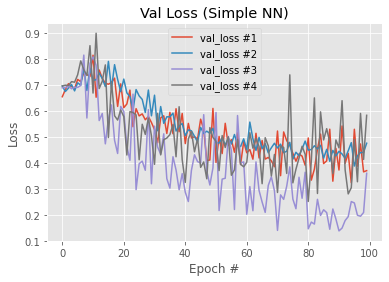

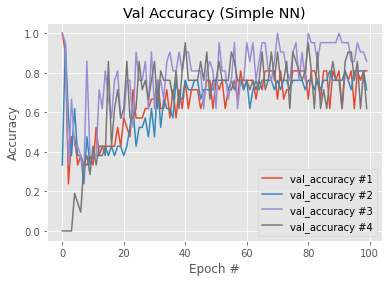

In [41]:
N = np.arange(0,100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, h1.history["val_loss"], label="val_loss #1")
plt.plot(N, h2.history["val_loss"], label="val_loss #2")
plt.plot(N, h3.history["val_loss"], label="val_loss #3")
plt.plot(N, h4.history["val_loss"], label="val_loss #4")
plt.title("Val Loss (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.style.use("ggplot")
plt.figure()
plt.plot(N, h1.history["val_accuracy"], label="val_accuracy #1")
plt.plot(N, h2.history["val_accuracy"], label="val_accuracy #2")
plt.plot(N, h3.history["val_accuracy"], label="val_accuracy #3")
plt.plot(N, h4.history["val_accuracy"], label="val_accuracy #4")
plt.title("Val Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

### Вывод
#### Уменьшение кол-ва нейронов на входе привело к увеличению потерь и уменьшению точности, а увелчиение кол-ва слоев увеличло точность и уменьшило потери 